In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

def d1(S, K, T, r, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) /\
                     sigma*np.sqrt(T)

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma* np.sqrt(T)

def delta_call(S, K, T, r, sigma):
    N = norm.cdf
    return N(d1(S, K, T, r, sigma))
    
def delta_fdm_call(S, K, T, r, sigma, ds = 1e-5, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_CALL(S+ds, K, T, r, sigma) -BS_CALL(S-ds, K, T, r, sigma))/\
                        (2*ds)
    elif method == 'forward':
        return (BS_CALL(S+ds, K, T, r, sigma) - BS_CALL(S, K, T, r, sigma))/ds
    elif method == 'backward':
        return (BS_CALL(S, K, T, r, sigma) - BS_CALL(S-ds, K, T, r, sigma))/ds
    
    
def delta_put(S, K, T, r, sigma):
    return - N(-d1(S, K, T, r, sigma))

def delta_fdm_put(S, K, T, r, sigma, ds = 1e-5, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_PUT(S+ds, K, T, r, sigma) -BS_PUT(S-ds, K, T, r, sigma))/\
                        (2*ds)
    elif method == 'forward':
        return (BS_PUT(S+ds, K, T, r, sigma) - BS_PUT(S, K, T, r, sigma))/ds
    elif method == 'backward':
        return (BS_PUT(S, K, T, r, sigma) - BS_PUT(S-ds, K, T, r, sigma))/ds



S = 100
K = 100
T = 1
r = 0.00
sigma = 0.25

prices = np.arange(1, 250,1)

deltas_c = delta_call(prices, K, T, r, sigma)
deltas_p = delta_put(prices, K, T, r, sigma)
deltas_back_c = delta_fdm_call(prices, K, T,r, sigma, ds = 0.01,method='backward')
deltas_forward_p = delta_fdm_put(prices, K, T,r, sigma, ds = 0.01,method='forward')



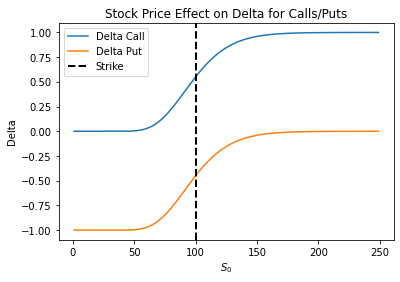

In [2]:
plt.plot(prices, deltas_c, label='Delta Call')
plt.plot(prices, deltas_p, label='Delta Put')
plt.xlabel('$S_0$')
plt.ylabel('Delta')
plt.title('Stock Price Effect on Delta for Calls/Puts' )
plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.legend()